In [1]:
import pandas as pd
from plotnine import  *
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
df = pd.read_csv('laptop_price.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
df.shape

(1275, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [5]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [6]:
# rename columns
def clean_text(col):
  cleaned_name = re.sub(r"\s\(\w+\)",'', col)
  return cleaned_name
df.columns = [clean_text(col) for col in df.columns]

In [7]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
CPU_Company         0
CPU_Type            0
CPU_Frequency       0
RAM                 0
Memory              0
GPU_Company         0
GPU_Type            0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.loc[df.duplicated(subset=['Product'])]

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70
10,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,4,500GB HDD,Intel,HD Graphics 620,No OS,1.86,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,2,500GB HDD,Intel,HD Graphics,Windows 10,2.20,379.00
1265,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i7 6700HQ,2.6,8,1TB HDD,Nvidia,GeForce GTX 960M,Windows 10,2.60,899.00
1267,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i7 7500U,2.7,8,1TB HDD,AMD,Radeon R5 M430,Linux,2.30,805.99
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00


In [10]:
df.query('Product == "MacBook Pro"')

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency,RAM,Memory,GPU_Company,GPU_Type,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.2,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97
12,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.8,16,256GB SSD,AMD,Radeon Pro 555,macOS,1.83,2439.97
15,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,256GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1518.55
17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.9,16,512GB SSD,AMD,Radeon Pro 560,macOS,1.83,2858.00
45,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.0,8,256GB SSD,Intel,Iris Graphics 540,macOS,1.37,1419.00
249,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,512GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,2040.00
270,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.9,8,512GB SSD,Intel,Iris Graphics 550,macOS,1.37,1958.90


In [11]:
df.duplicated(subset=['Product','CPU_Type', 'CPU_Frequency', 'RAM', 'Memory','GPU_Company', 'GPU_Type']).sum()

122

In [12]:
df = df.loc[~df.duplicated(subset=['Product','CPU_Type', 'CPU_Frequency', 'RAM', 'Memory',
       'GPU_Company', 'GPU_Type'])].reset_index(drop=True)

In [13]:
num_cols = df.select_dtypes(exclude = 'object').columns
cat_cols = df.select_dtypes(include = 'object').columns

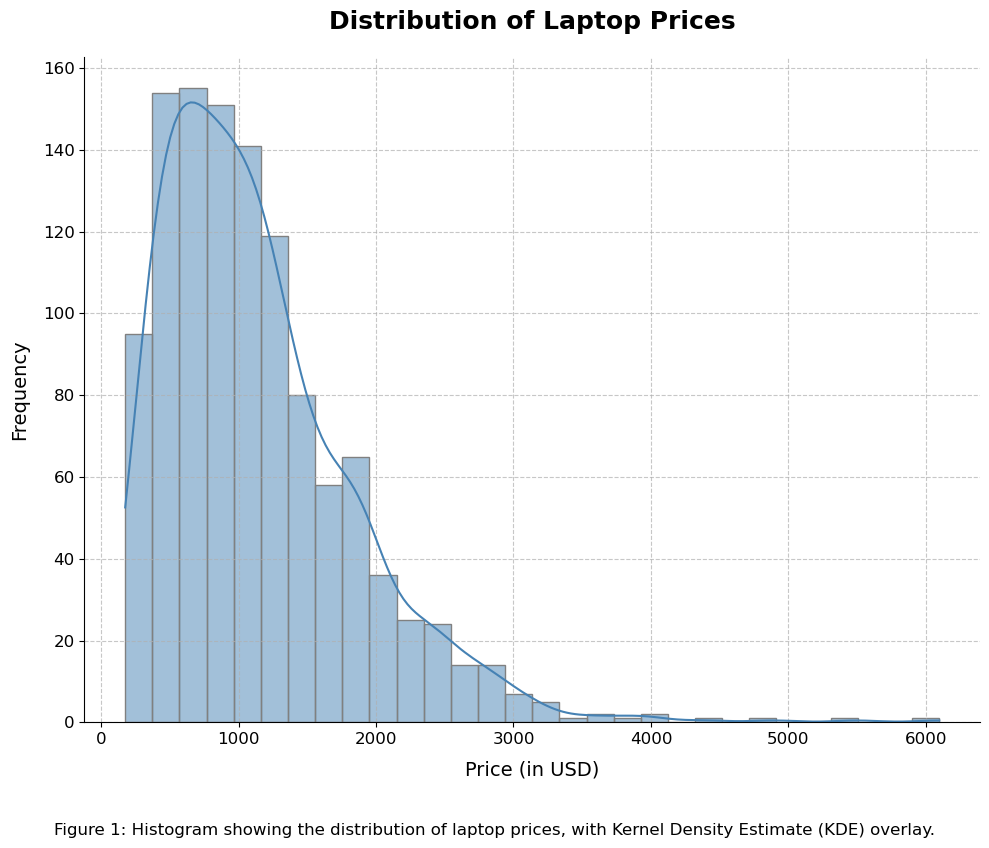

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Price', kde=True, bins=30, color='steelblue', edgecolor='grey')

# Add title and axis labels with professional formatting
plt.title('Distribution of Laptop Prices', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Price (in USD)', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)

# Style adjustments for a clean, academic look
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()  # Removes top and right spines

# Add a caption under the plot (optional for academic reports)
plt.figtext(0.5, -0.05, 'Figure 1: Histogram showing the distribution of laptop prices, with Kernel Density Estimate (KDE) overlay.',
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()  # Adjusts plot to make room for labels and title
plt.show()



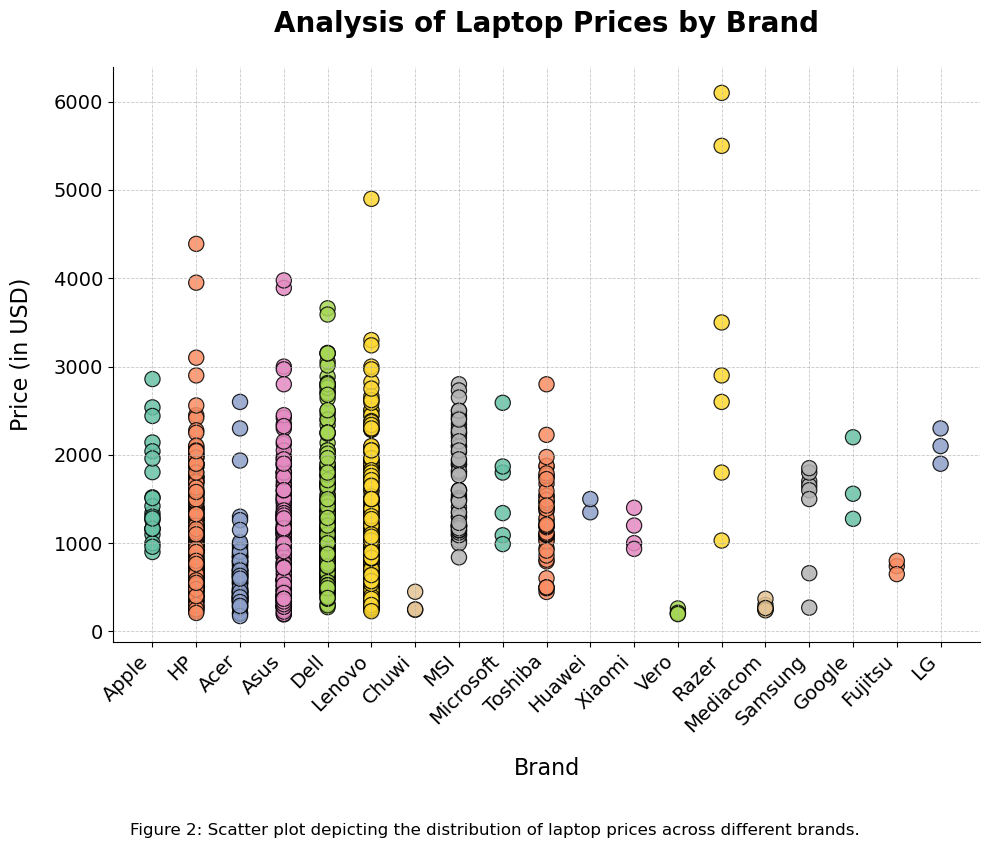

In [15]:
plt.figure(figsize=(10, 8))

# Scatter plot with color differentiation and enhanced formatting
sns.scatterplot(data=df, x='Company', y='Price', hue='Company', palette='Set2', s=120, edgecolor='black', alpha=0.85, legend=False)

# Title and axis labels with formal formatting
plt.title("Analysis of Laptop Prices by Brand", fontsize=20, fontweight='bold', pad=25)
plt.xlabel("Brand", fontsize=16, labelpad=15)
plt.ylabel("Price (in USD)", fontsize=16, labelpad=15)

# Rotate x-axis labels for clarity and set appropriate font sizes
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines and style adjustments for clarity
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
sns.despine()

# Caption (optional, for academic report consistency)
plt.figtext(0.5, -0.05, 'Figure 2: Scatter plot depicting the distribution of laptop prices across different brands.',
            wrap=True, horizontalalignment='center', fontsize=12)

# Adjust layout to prevent label and title overlap
plt.tight_layout()

plt.show()


/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/1293187419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



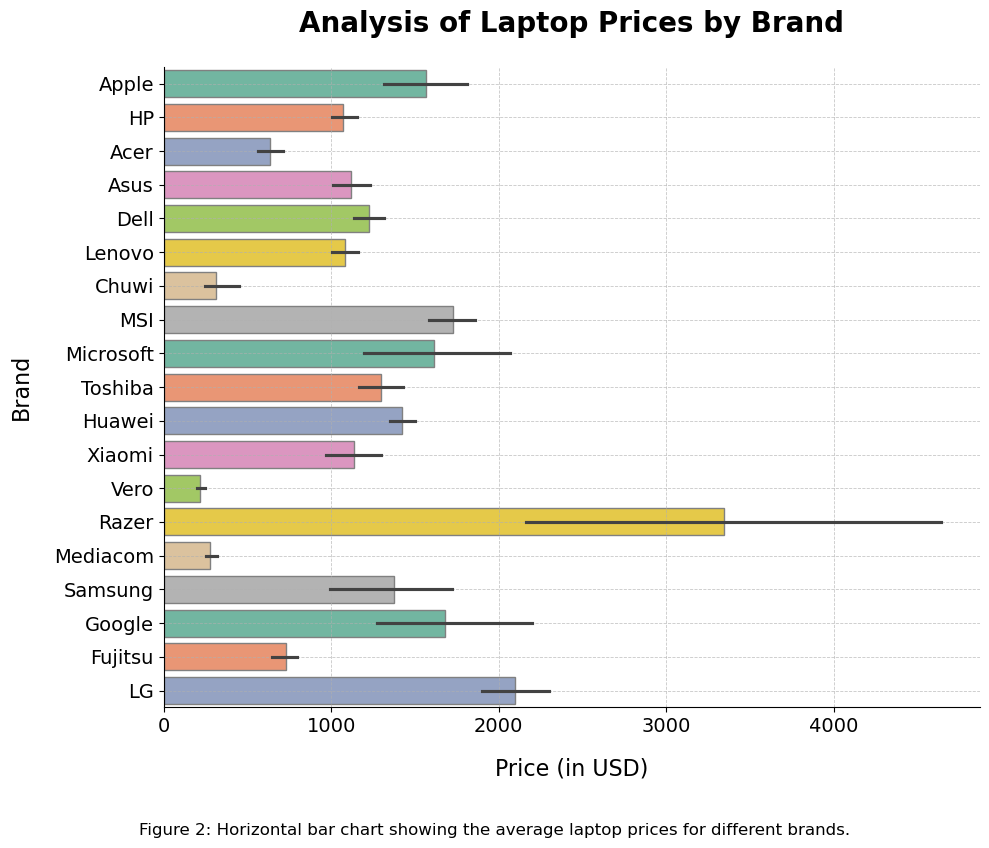

In [16]:
plt.figure(figsize=(10, 8))

# Horizontal bar plot
sns.barplot(data=df, x='Price', y='Company', palette='Set2', edgecolor='grey')

# Title and axis labels with formal formatting
plt.title("Analysis of Laptop Prices by Brand", fontsize=20, fontweight='bold', pad=25)
plt.xlabel("Price (in USD)", fontsize=16, labelpad=15)
plt.ylabel("Brand", fontsize=16, labelpad=15)

# Increase font sizes for readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines for clarity
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
sns.despine()

# Caption (optional, for academic report consistency)
plt.figtext(0.5, -0.05, 'Figure 2: Horizontal bar chart showing the average laptop prices for different brands.',
            wrap=True, horizontalalignment='center', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


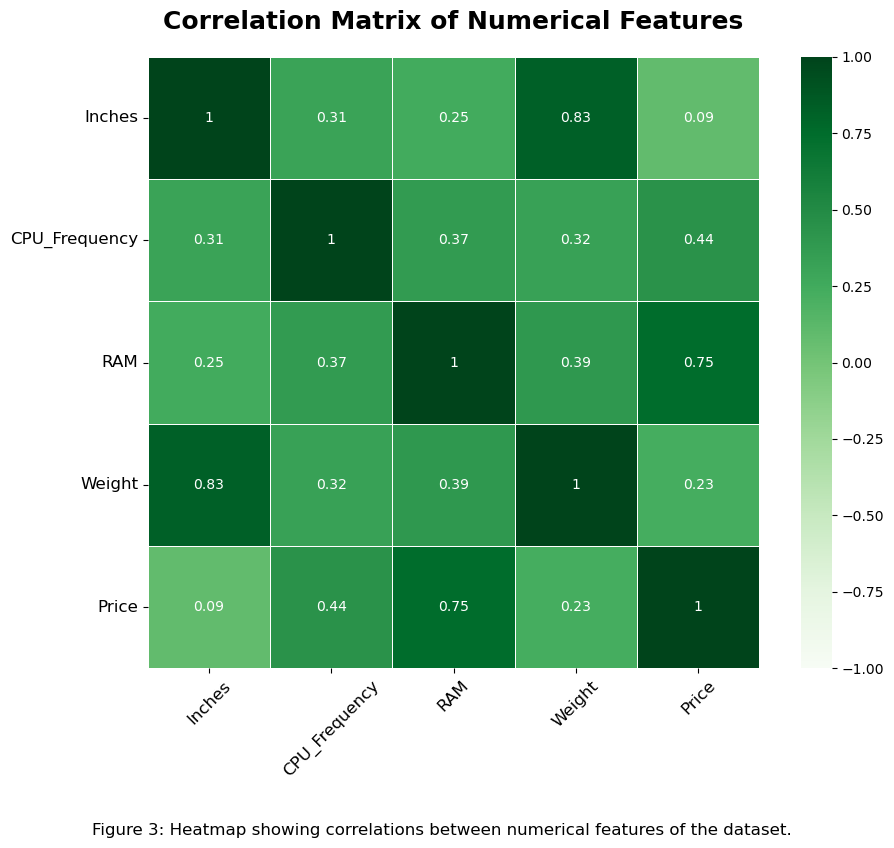

In [17]:
plt.figure(figsize=(10, 8))

# Heatmap with blue colormap and figure enhancements
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greens', vmin=-1, vmax=1, linewidths=0.5, linecolor='white', square=True)

# Add title with academic formatting
plt.title('Correlation Matrix of Numerical Features', fontsize=18, fontweight='bold', pad=20)

# Improve axis labels readability
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Add caption below the figure (optional for academic reports)
plt.figtext(0.5, -0.05, 'Figure 3: Heatmap showing correlations between numerical features of the dataset.',
            wrap=True, horizontalalignment='center', fontsize=12)

# Adjust layout
plt.tight_layout()

plt.show()


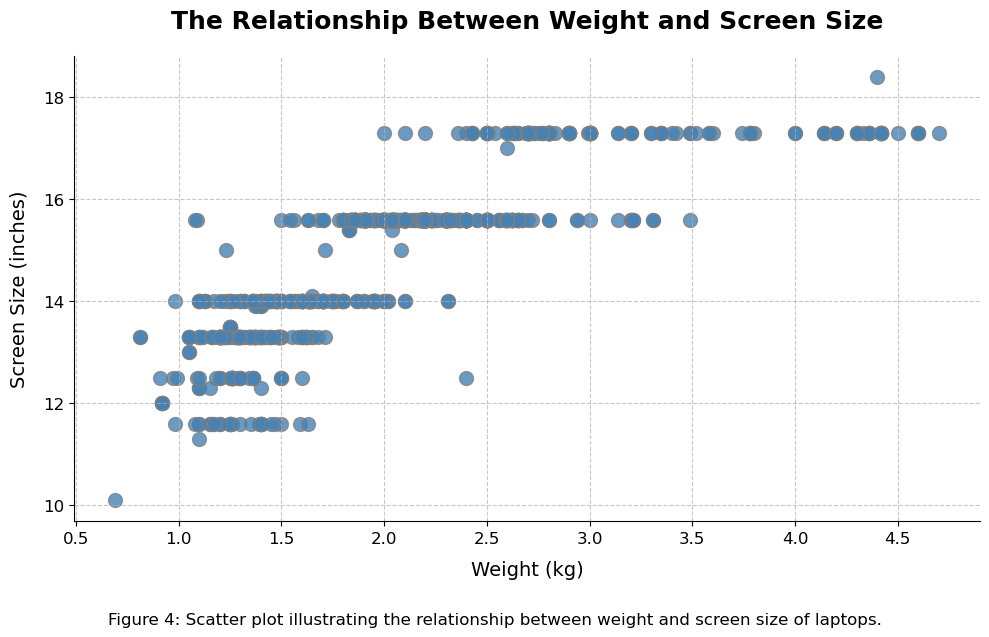

In [18]:
plt.figure(figsize=(10, 6))

# Scatter plot with improved styling
plt.scatter(x=df['Weight'], y=df['Inches'], color='steelblue', edgecolor='grey', alpha=0.8, s=100)

# Title and axis labels with formal formatting
plt.title("The Relationship Between Weight and Screen Size", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Weight (kg)", fontsize=14, labelpad=10)
plt.ylabel("Screen Size (inches)", fontsize=14, labelpad=10)

# Improve axis tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optionally add a caption below the figure
plt.figtext(0.5, -0.05, 'Figure 4: Scatter plot illustrating the relationship between weight and screen size of laptops.',
            wrap=True, horizontalalignment='center', fontsize=12)
sns.despine()

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


In [19]:
Inches_weight = smf.ols('Price ~ Inches + Weight', df).fit()
Inches_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     55.72
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           8.00e-24
Time:                        14:47:44   Log-Likelihood:                -9145.8
No. Observations:                1153   AIC:                         1.830e+04
Df Residuals:                    1150   BIC:                         1.831e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2482.8959    290.901      8.535      0.000    1912.141    3053.651
Inches      -161.4669     24.788     -6.514      0.000    -210.102    -112.832
Weight       527.8643     52.472     10.060      0.000     424.913     630.816
==============================================================================
Omnibus:                      325.182   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1026.953
Skew:                           1.386   Prob(JB):                    1.00e-223
Kurtosis:                       6.701   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# r2j_Inches_weight = Inches_weight.rsquared
# vif_j_Inches_weight = 1/(1-r2j_Inches_weight)
# print(f'VIF: {vif_j_Inches_weight}')

In [21]:
# Some variables need to be recategorized to lower the number of catergorie
for col in df[cat_cols]:
  print(f"{col} : {df[col].nunique()} catergories")
# selected catergorical predictors : TypeName, ScreenResolution, CPU_Company, Memory, (OpSys)

Company : 19 catergories
Product : 618 catergories
TypeName : 6 catergories
ScreenResolution : 39 catergories
CPU_Company : 3 catergories
CPU_Type : 93 catergories
Memory : 39 catergories
GPU_Company : 4 catergories
GPU_Type : 106 catergories
OpSys : 9 catergories


In [22]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [23]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [24]:
df['CPU_Company'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [25]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [26]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

### Feature engineering

`Memory` focusesfocus on several key aspects: storage type, total storage capacity, and whether it's a dual storage system.

1. Storage Type: SSD, HDD, Hybrid, or Flash Storage
2. Total Storage Capacity: in GB
3. Dual Storage: Yes or No

** Reference(Baseline) Category : Memory_Size_Large

In [27]:
def recategorize_memory(storage_string):
    storage_string = str(storage_string)  # Ensure it's a string
    # Initialize variables
    total_storage = 0
    has_ssd = False
    has_hdd = False
    has_hybrid = False
    has_flash = False
    is_dual = '+' in storage_string

    # Split for dual storage systems
    storages = storage_string.split('+')

    for storage in storages:
        storage = storage.strip().lower()
        # Extract size
        size = float(storage.split()[0].replace('tb', '000').replace('gb', ''))
        # Identify type and add to total
        if 'ssd' in storage:
            has_ssd = True
            total_storage += size
        elif 'hdd' in storage:
            has_hdd = True
            total_storage += size
        elif 'hybrid' in storage:
            has_hybrid = True
            total_storage += size
        elif 'flash' in storage:
            has_flash = True
            total_storage += size
    # Categorize total storage
    if total_storage <= 128:
        size_category = 'Small'
    elif total_storage <= 512:
        size_category = 'Medium'
    else:
        size_category = 'Large'

    return pd.Series({
        'Memory_size': size_category
    })


In [28]:
df2 = df[list(num_cols)+ ['TypeName','CPU_Company']]

In [29]:
df2['Memory_size'] = df['Memory'].apply(recategorize_memory)
df2.head()

/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/1311362246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Inches,CPU_Frequency,RAM,Weight,Price,TypeName,CPU_Company,Memory_size
0,13.3,2.3,8,1.37,1339.69,Ultrabook,Intel,Small
1,13.3,1.8,8,1.34,898.94,Ultrabook,Intel,Small
2,15.6,2.5,8,1.86,575.00,Notebook,Intel,Medium
3,15.4,2.7,16,1.83,2537.45,Ultrabook,Intel,Medium
4,13.3,3.1,8,1.37,1803.60,Ultrabook,Intel,Medium


- `ScreenResolution` extractstract several key features: resolution, display technology, and touchscreen capability. And turn it into 3 new catergorical predictor
1. Resolution : Extract width and height, and categorize into common standards (e.g., HD, Full HD, 4K)
2. Display Technology: Identify IPS Panel and Retina Display
Touchscreen: Determine if it's a touchscreen
** Reference category : Resolution_Category_4K

In [30]:
def recategorize_resolution(resolution_string):
    resolution_string = str(resolution_string).lower()

    # Extract width and height
    dimensions = [int(s) for s in resolution_string.replace('x', ' ').split() if s.isdigit()]
    if len(dimensions) >= 2:
        width, height = max(dimensions), min(dimensions)
    else:
        width, height = 0, 0

    # Categorize resolution
    if width >= 3840 or height >= 2160:
        resolution_category = '4K+'
    elif width >= 2560 or height >= 1440:
        resolution_category = 'QHD+'
    elif width >= 1920 or height >= 1080:
        resolution_category = 'Full HD'
    elif width >= 1280 or height >= 720:
        resolution_category = 'HD'
    else:
        resolution_category = 'Less than HD'

    return pd.Series({
        'Resolution_Category': resolution_category
    })


In [31]:
df2[ 'Resolution_Category'] = df['ScreenResolution'].apply(recategorize_resolution)

/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/3978015772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


- `OpSys` identifying the type of operating system and grouping them into broader categories to reduce the number of unique values. This process recategorizes the operating systems into six main groups, simplifying the feature for better model performance and interpretability:
1. Windows: Includes all versions of Windows, such as Windows 10, Windows 7, and Windows 10 S.
2. MacOS: Groups both macOS and Mac OS X into a single category.
3. Linux: Identifies devices running Linux as a distinct category.
4. Chrome OS: Categorizes laptops that run Chrome OS.
5. Android: Groups devices with Android as their operating system.
6. No OS/Other: Combines laptops that either ship without an operating system or have less common or unidentified operating systems into one category.

**Reference Category(Baseline): OpSys_Category_Android

In [32]:
def recategorize_opsys(opsys_string):
    opsys_string = str(opsys_string).strip().lower()  # Ensure it's a string and in lowercase

    # Recategorize based on operating system types
    if 'windows' in opsys_string:
        os_category = 'Windows'
    elif 'mac' in opsys_string:
        os_category = 'MacOS'
    elif 'linux' in opsys_string:
        os_category = 'Linux'
    elif 'chrome' in opsys_string:
        os_category = 'ChromeOS'
    elif 'android' in opsys_string:
        os_category = 'Android'
    else:
        os_category = 'Other/NoOS'

    return pd.Series({
        'OS_Category': os_category
    })


In [33]:
df2[ 'OpSys_Category'] = df['OpSys'].apply(recategorize_opsys)

/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/3517717910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df2.head()

,Inches,CPU_Frequency,RAM,Weight,Price,TypeName,CPU_Company,Memory_size,Resolution_Category,OpSys_Category
0,13.3,2.3,8,1.37,1339.69,Ultrabook,Intel,Small,QHD+,MacOS
1,13.3,1.8,8,1.34,898.94,Ultrabook,Intel,Small,HD,MacOS
2,15.6,2.5,8,1.86,575.00,Notebook,Intel,Medium,Full HD,Other/NoOS
3,15.4,2.7,16,1.83,2537.45,Ultrabook,Intel,Medium,QHD+,MacOS
4,13.3,3.1,8,1.37,1803.60,Ultrabook,Intel,Medium,QHD+,MacOS


In [35]:
df2.shape

(1153, 10)

In [36]:
y, X = dmatrices('Price ~ Inches + CPU_Frequency + RAM + TypeName + CPU_Company + Memory_size + Resolution_Category + OpSys_Category', data=df2, return_type='dataframe')
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif)

,features,VIF Factor
0,Intercept,1400.913882
1,TypeName[T.Gaming],3.830029
2,TypeName[T.Netbook],1.387497
3,TypeName[T.Notebook],4.175871
4,TypeName[T.Ultrabook],2.464481
5,TypeName[T.Workstation],1.401994
6,CPU_Company[T.Intel],1.127406
7,CPU_Company[T.Samsung],1.084860
8,Memory_size[T.Medium],1.773046
9,Memory_size[T.Small],1.845829


## Resolution_Category and OpSys_Category have high VIF




In [37]:
y, X_new = dmatrices('Price ~ Weight + CPU_Frequency + RAM + TypeName + CPU_Company + Memory_size', data=df2, return_type='dataframe')
vif = pd.DataFrame()
vif["features"] = X_new.columns
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
print(vif)

                   features  VIF Factor
0                 Intercept   87.237720
1        TypeName[T.Gaming]    4.024256
2       TypeName[T.Netbook]    1.268710
3      TypeName[T.Notebook]    3.704666
4     TypeName[T.Ultrabook]    2.345006
5   TypeName[T.Workstation]    1.362879
6      CPU_Company[T.Intel]    1.095020
7    CPU_Company[T.Samsung]    1.034603
8     Memory_size[T.Medium]    1.713324
9      Memory_size[T.Small]    1.646579
10                   Weight    2.532636
11            CPU_Frequency    1.433471
12                      RAM    1.650327


In [38]:
full_model = smf.ols('Price ~ Inches + CPU_Frequency + RAM + TypeName + CPU_Company + Memory_size + Resolution_Category + OpSys_Category', df2).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          2.86e-320
Time:                        14:47:45   Log-Likelihood:                -8407.3
No. Observations:                1153   AIC:                         1.686e+04
Df Residuals:                    1132   BIC:                         1.696e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [39]:
# import matplotlib.pyplot as plt
# from google.colab import files

# # Generate the regression model summary
# summary = full_model.summary()

# # Save the summary to a figure in a professional academic format
# plt.figure(figsize=(6, 8))  # Adjust the figure size
# plt.text(0.01, 1.0, str(summary), {'fontsize': 10}, fontproperties='monospace')
# plt.axis('off')  # Hide the axes for a cleaner look
# plt.tight_layout()
# plt.figtext(0.7, -0.03, 'Figure 5: Regression model summary.',
#              horizontalalignment='center', wrap = True, fontsize=12)
# # Save the figure as a PNG file
# plt.savefig('regression_summary.png', bbox_inches='tight', dpi=300)
# # Display the figure
# plt.show()
# #Download the saved image
# # files.download('regression_summary.png')

In [40]:
df2.shape, 10**2

((1153, 10), 100)

## Select the useful predictor based on t-test from the summary table above.
- TypeName, CPU_Company, Memory_size, Inches, Weight, CPU_Frequency, RAM

In [41]:
df3 = df2[['Price','TypeName', 'CPU_Company', 'Memory_size', 'Inches', 'CPU_Frequency', 'RAM']]
for column in ['TypeName', 'CPU_Company', 'Memory_size']:
        df3[column] = df3[column].astype('category')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Price          1153 non-null   float64 
 1   TypeName       1153 non-null   category
 2   CPU_Company    1153 non-null   category
 3   Memory_size    1153 non-null   category
 4   Inches         1153 non-null   float64 
 5   CPU_Frequency  1153 non-null   float64 
 6   RAM            1153 non-null   int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 40.0 KB


/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/694582032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/694582032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/694582032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [42]:
# Separate features and target
X = df3.drop('Price', axis=1)
y = df3['Price']


In [43]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
def create_formula(target, predictors):
    # Join the predictors into a string separated by ' + '
    predictors_str = ' + '.join(predictors)
    # Create the final formula string
    formula = f"{target} ~ {predictors_str}"
    return formula

def subset_selection(X, y):
    n, p = X.shape
    models = []
    target = y.name  # Assuming y is a pandas Series and has a name attribute
    # Add the null model (intercept only)
    X_null = pd.DataFrame({'const': np.ones(n)})
    model_null = sm.OLS(y, X_null).fit()
    models.append((model_null, ()))

    for k in range(3, p + 1):  # Iterate over subset sizes
        for combo in combinations(X.columns, k):  # Generate combinations of predictors
            # Create the formula using the create_formula function
            formula = create_formula(target, combo)
            model = smf.ols(formula=formula, data=X.join(y)).fit()
            models.append((model, combo))

    return models

In [45]:
def create_formula(target, predictors):
    # Join the predictors into a string separated by ' + '
    predictors_str = ' + '.join(predictors)
    # Create the final formula string
    formula = f"{target} ~ {predictors_str}"
    return formula

def subset_selection(X, y):
    # Ensure that y is a pandas Series and has a name attribute
    if isinstance(y, pd.Series):
        target = y.name  # Assuming y has a name
    else:
        raise ValueError("y must be a pandas Series with a name.")

    # Check if indices of X and y align
    if not X.index.equals(y.index):
        raise ValueError("The indices for endog and exog are not aligned.")

    n, p = X.shape
    models = []

    # Add the null model (intercept only)
    X_null = pd.DataFrame({'const': np.ones(n)}, index=X.index)  # Use the same index as X
    model_null = sm.OLS(y, X_null).fit()
    models.append((model_null, ()))

    for k in range(3, p + 1):  # Iterate over subset sizes
        for combo in combinations(X.columns, k):  # Generate combinations of predictors
            # Create the formula using the create_formula function
            formula = create_formula(target, combo)
            # Fit the model with the combined DataFrame of X and y
            model = smf.ols(formula=formula, data=X.join(y),).fit()
            models.append((model, combo))

    return models

In [46]:
models = subset_selection(X_train, y_train)

In [47]:
def calculate_metrics(model, full_model, X, y):
    n = len(y)
    # k = model.df_model  # Number of predictors, excluding intercept
    k = len(model.params) - 1
    # AIC
    aic = model.aic
    # BIC
    bic = model.bic
    # Adjusted R-squared
    r2 = model.rsquared
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k)
    #Cp
    p = len(model.params)  # includes intercept
    SSRes = np.sum(model.resid**2)
    MSE_full = np.sum(full_model.resid**2) / (n - len(full_model.params))
    cp = (SSRes / MSE_full) - (n - 2*p)
    return aic, bic,adj_r2, cp, int(k) #dont consider intercept as a predictor
models = models[1:]
full_model = models[-1][0]
results = []
for model, combo in models:
    aic, bic, adj_r2, cp, num_predictors = calculate_metrics(model,full_model, X_train[list(combo)], y_train)
    results.append({
        'Predictors': combo,
        # 'n_Predictors': num_predictors,
        'AIC': round(aic, 3),
        'BIC': round(bic, 3),
        'Adjusted R^2': round(adj_r2, 3),
        'Cp' : round(cp, 3)
    })
# Convert results to pd DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Predictors').reset_index(drop=True)
results_df

,Predictors,AIC,BIC,Adjusted R^2,Cp
0,"(CPU_Company, CPU_Frequency, RAM)",13923.573,13947.705,0.598,296.847
1,"(CPU_Company, Inches, CPU_Frequency)",14500.711,14524.843,0.248,1348.599
2,"(CPU_Company, Inches, CPU_Frequency, RAM)",13881.240,13910.199,0.616,242.096
3,"(CPU_Company, Inches, RAM)",13983.680,14007.813,0.571,378.280
4,"(CPU_Company, Memory_size, CPU_Frequency)",14468.466,14497.425,0.275,1268.177
5,"(CPU_Company, Memory_size, CPU_Frequency, RAM)",13854.079,13887.864,0.628,208.228
6,"(CPU_Company, Memory_size, Inches)",14637.966,14666.926,0.129,1707.783
7,"(CPU_Company, Memory_size, Inches, CPU_Frequency)",14468.290,14502.076,0.276,1265.042
8,"(CPU_Company, Memory_size, Inches, CPU_Frequen...",13837.722,13876.334,0.635,188.224
9,"(CPU_Company, Memory_size, Inches, RAM)",13922.497,13956.282,0.599,294.209


In [48]:
from tabulate import tabulate
headers = ['Predictors', 'n_Predictors', 'AIC', 'BIC', 'Adjusted R^2', 'Cp']
print(tabulate(results_df, headers=headers, tablefmt='pretty'))


+------------+------------------------------------------------------------------------------+-----------+-----------+--------------+----------+
| Predictors |                                 n_Predictors                                 |    AIC    |    BIC    | Adjusted R^2 |    Cp    |
+------------+------------------------------------------------------------------------------+-----------+-----------+--------------+----------+
|     0      |                   ('CPU_Company', 'CPU_Frequency', 'RAM')                    | 13923.573 | 13947.705 |    0.598     | 296.847  |
|     1      |                  ('CPU_Company', 'Inches', 'CPU_Frequency')                  | 14500.711 | 14524.843 |    0.248     | 1348.599 |
|     2      |              ('CPU_Company', 'Inches', 'CPU_Frequency', 'RAM')               | 13881.24  | 13910.199 |    0.616     | 242.096  |
|     3      |                       ('CPU_Company', 'Inches', 'RAM')                       | 13983.68  | 14007.813 |    0.571     |  37

/var/folders/bl/j9t86cr15b7fwt0vpj5_kgdm0000gn/T/ipykernel_27334/832060494.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


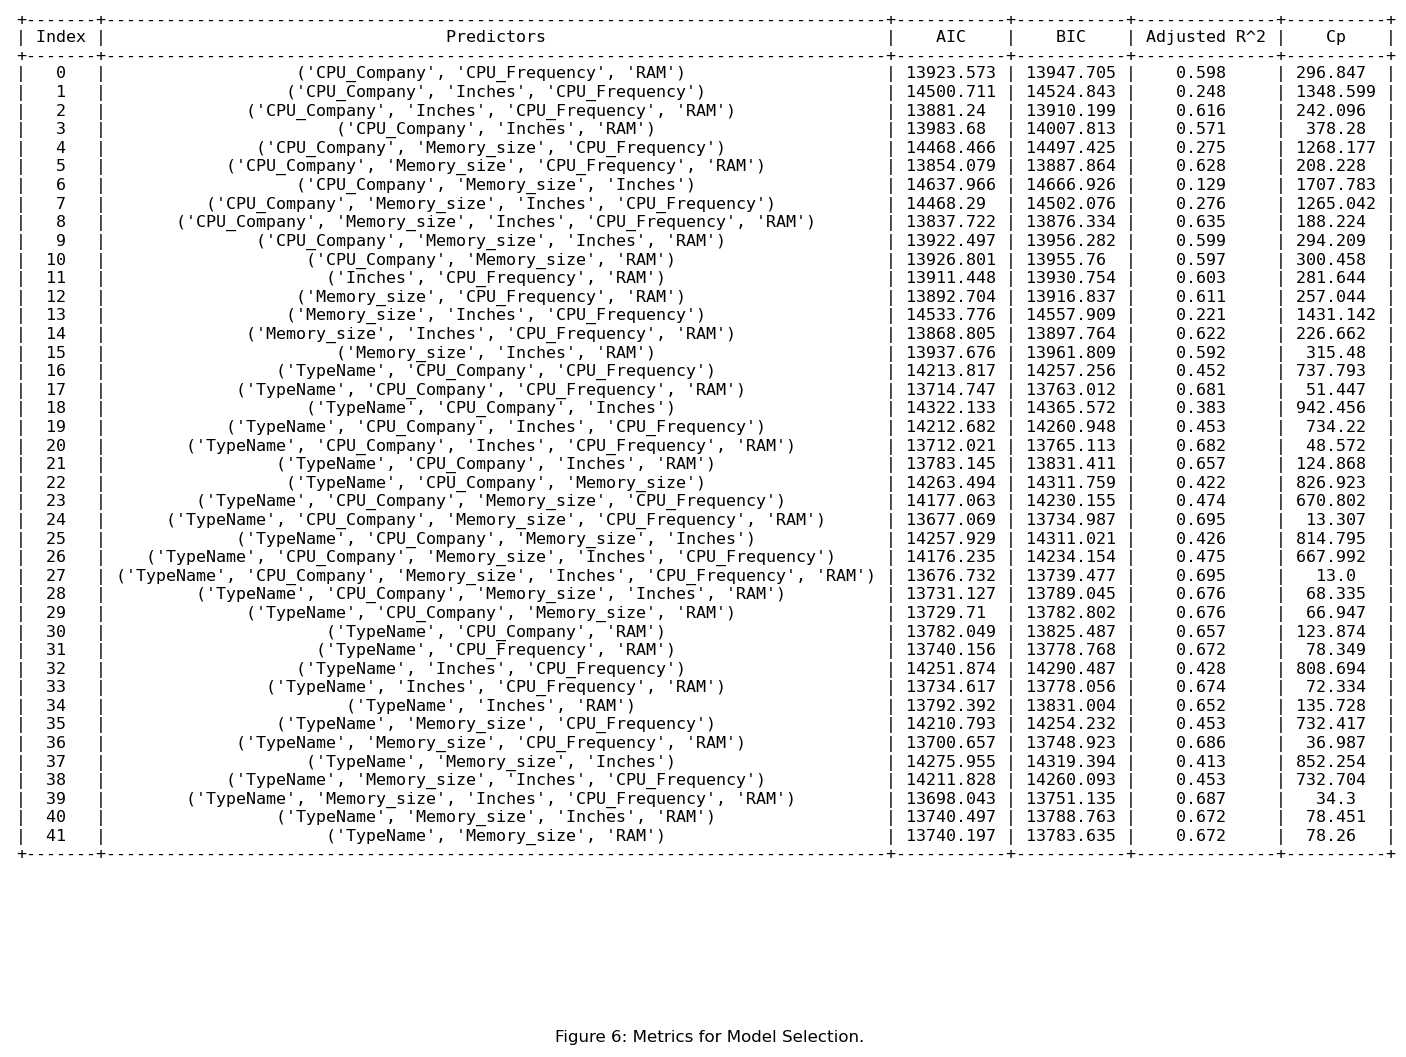

In [49]:
from tabulate import tabulate
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Your results_df and table setup
headers = ['Index', 'Predictors', 'AIC', 'BIC', 'Adjusted R^2', 'Cp']
table = tabulate(results_df, headers=headers, tablefmt='pretty')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size accordingly

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Add table text
ax.text(0.01, 0.99, table, {'fontsize': 12}, fontproperties='monospace', va='top')

# Adjust layout
plt.tight_layout()
plt.figtext(1, -1.7, 'Figure 6: Metrics for Model Selection.',
             horizontalalignment='center', wrap = True, fontsize=12)

# Save the figure to a BytesIO object
buf = BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)

# Convert BytesIO to an image and save
image = Image.open(buf)
image.save('results_table.png')


In [50]:

# Print the best model for each metric
metrics = ['AIC', 'BIC', 'Cp', 'Adjusted R^2']

best_models = {}
for metric in metrics:
    if metric == 'Adjusted R^2':
        best_row = results_df.loc[results_df[metric].idxmax()]
    else:
        best_row = results_df.loc[results_df[metric].idxmin()]

    best_models[metric] = best_row  # Store the best model for the current metric

# Print the best models for each metric
for metric, model_info in best_models.items():
    print(f"Best model for {metric}:")
    print(f"Predictors: {model_info['Predictors']}")
    print(f"Value: {model_info[metric]}")
    print('\n')


Best model for AIC:
Predictors: ('TypeName', 'CPU_Company', 'Memory_size', 'Inches', 'CPU_Frequency', 'RAM')
Value: 13676.732


Best model for BIC:
Predictors: ('TypeName', 'CPU_Company', 'Memory_size', 'CPU_Frequency', 'RAM')
Value: 13734.987


Best model for Cp:
Predictors: ('TypeName', 'CPU_Company', 'Memory_size', 'Inches', 'CPU_Frequency', 'RAM')
Value: 13.0


Best model for Adjusted R^2:
Predictors: ('TypeName', 'CPU_Company', 'Memory_size', 'CPU_Frequency', 'RAM')
Value: 0.695




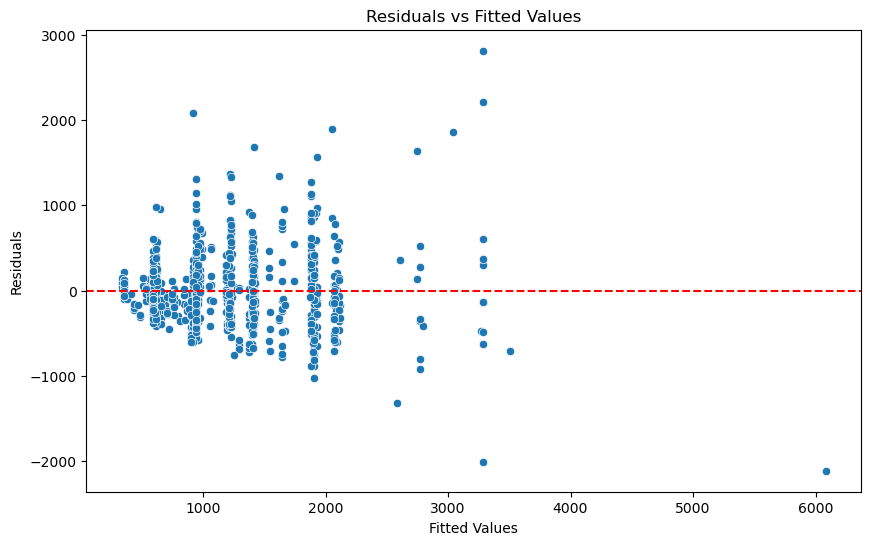

In [51]:
best_model = models[results_df['BIC'].idxmin()][0]

# Linearity: Residual plot
residuals = best_model.resid
fitted = best_model.fittedvalues

plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


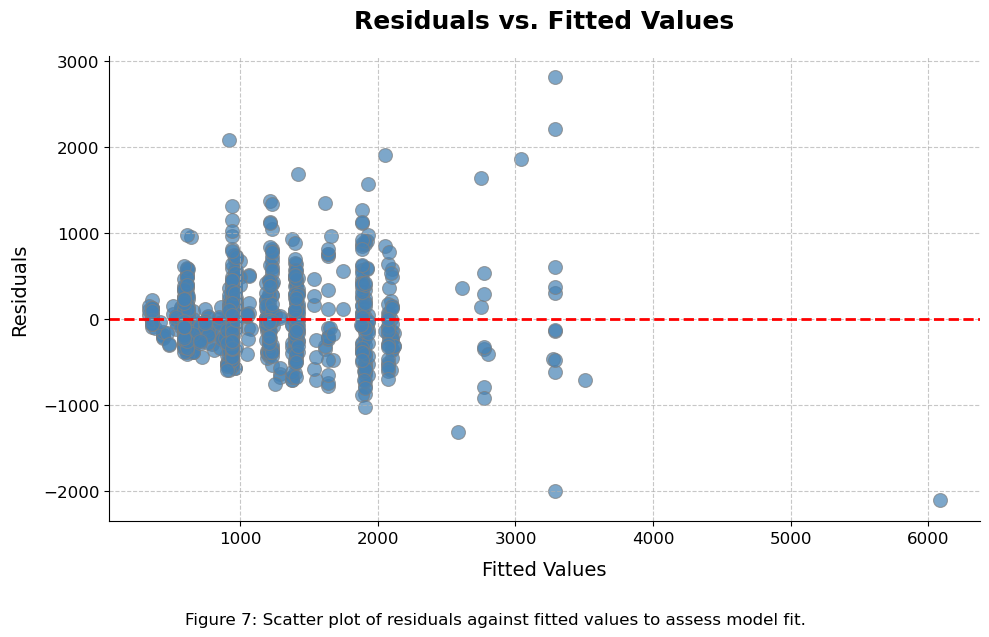

In [52]:
plt.figure(figsize=(10, 6))

# Scatter plot of residuals vs. fitted values
sns.scatterplot(x=fitted, y=residuals, color='steelblue', edgecolor='grey', alpha=0.7, s=100)

# # Horizontal line at zero for reference
plt.axhline(0, linestyle='--', color='red', linewidth=2)

# Title and axis labels with formal formatting
plt.title('Residuals vs. Fitted Values', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Fitted Values', fontsize=14, labelpad=10)
plt.ylabel('Residuals', fontsize=14, labelpad=10)

# Improve axis tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optionally add a caption below the figure
plt.figtext(0.5, -0.05, 'Figure 7: Scatter plot of residuals against fitted values to assess model fit.',
            wrap=True, horizontalalignment='center', fontsize=12)
sns.despine()
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



•	Fanning out pattern: There appears to be a fanning pattern in the residuals, meaning that as the fitted values increase, the spread (variance) of the residuals also increases. This suggests heteroscedasticity, where the variance of the errors is not constant across all levels of the predictor variables.
•	Centering around zero: Most of the residuals are centered around zero, which is a good sign. It indicates that the model’s predictions are not consistently overestimating or underestimating the observed values.
•	Some outliers: There are a few points that are far from the center (both vertically and horizontally), indicating potential outliers or observations where the model struggled to predict accurately.

<Figure size 1000x600 with 0 Axes>

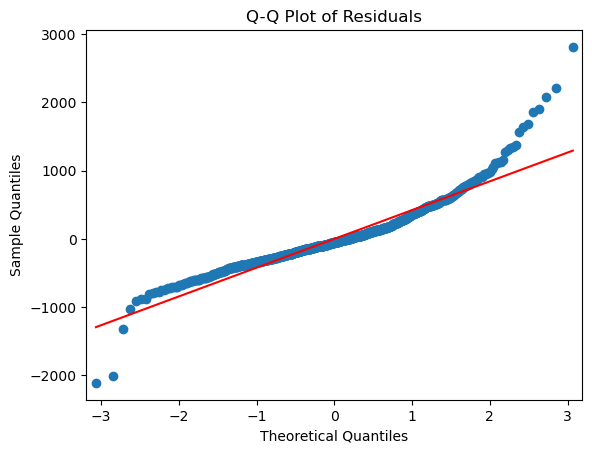

In [53]:
#Normality of Residuals: Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

/Users/eunicetu/anaconda3/lib/python3.12/site-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.


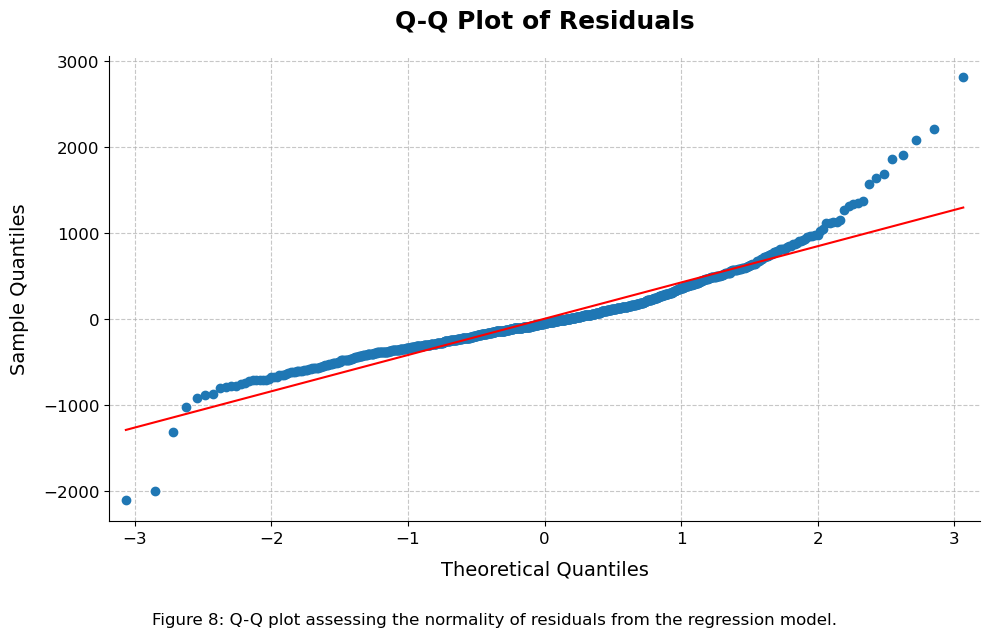

In [54]:
import statsmodels.api as sm

# Create a Q-Q plot for normality of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s', ax=plt.gca(), marker='o', color='steelblue')

# Title and axis labels with formal formatting
plt.title('Q-Q Plot of Residuals', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Theoretical Quantiles', fontsize=14, labelpad=10)
plt.ylabel('Sample Quantiles', fontsize=14, labelpad=10)

# Improve axis tick font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Optionally add a caption below the figure
plt.figtext(0.5, -0.05, 'Figure 8: Q-Q plot assessing the normality of residuals from the regression model.',
            wrap=True, horizontalalignment='center', fontsize=12)
sns.despine()
# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


Linearity in the middle: The residuals generally follow the red line in the middle of the plot, which indicates that the residuals are approximately normally distributed in this range.
Deviations in the tails: At the ends of the plot (both on the left and right), the points deviate significantly from the red line. This suggests that the distribution of residuals has heavy tails, meaning there are more extreme values (potentially outliers) than what would be expected under a normal distribution.
Skewness: The slight asymmetry in how the residuals deviate at the extremes may indicate that the distribution is not perfectly symmetric, suggesting some skewness.


Next Steps: transform the response variable or residuals (e.g., using a logarithmic or Box-Cox transformation). Or, consider using robust regression methods that are less sensitive to deviations from normality, or investigate whether the outliers reflect important underlying data points.
